In [83]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

In [86]:
%matplotlib inline

In [3]:
df= pd.read_csv('crypto-markets.csv', parse_dates=['date'], index_col='date')

In [4]:
df.head()

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2013-04-28,bitcoin,BTC,Bitcoin,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
2013-04-29,bitcoin,BTC,Bitcoin,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2013-04-30,bitcoin,BTC,Bitcoin,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
2013-05-01,bitcoin,BTC,Bitcoin,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
2013-05-02,bitcoin,BTC,Bitcoin,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [9]:
df.drop(['slug','ranknow','volume','market'], axis=1)

,symbol,name,open,high,low,close,close_ratio,spread
date,,,,,,,,
2013-04-28,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.5438,3.88
2013-04-29,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.7813,13.49
2013-04-30,BTC,Bitcoin,144.00,146.93,134.05,139.00,0.3843,12.88
2013-05-01,BTC,Bitcoin,139.00,139.89,107.72,116.99,0.2882,32.17
2013-05-02,BTC,Bitcoin,116.38,125.60,92.28,105.21,0.3881,33.32
...,...,...,...,...,...,...,...,...
2018-11-26,NANOX,Project-X,22424.60,23049.30,17607.50,20724.80,0.5728,5441.80
2018-11-27,NANOX,Project-X,20711.90,23742.10,19292.90,23298.70,0.9003,4449.20
2018-11-28,NANOX,Project-X,23320.90,25235.10,19888.10,24442.70,0.8518,5347.00


In [10]:
df["closing_price"] = (df['close'] > 2.1)

In [11]:
df.head()

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread,closing_price
date,,,,,,,,,,,,,
2013-04-28,bitcoin,BTC,Bitcoin,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88,True
2013-04-29,bitcoin,BTC,Bitcoin,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49,True
2013-04-30,bitcoin,BTC,Bitcoin,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88,True
2013-05-01,bitcoin,BTC,Bitcoin,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17,True
2013-05-02,bitcoin,BTC,Bitcoin,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32,True


# Regression

In [12]:
ind = df[["open"]].values
dep = df[["close"]].values

In [17]:
model = LinearRegression() # LinearRegression
model = model.fit(ind, dep)

In [22]:
model.predict([[134.44]])  #predict close price 

array([[142.68729849]])

In [26]:
Pred = model.predict(ind)

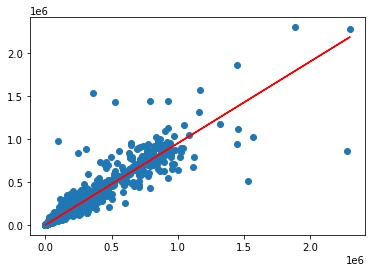

In [87]:
plt.scatter(ind, dep)
plt.plot(ind, Pred, c = "red")
plt.show()

# Classification Algos

# 1. Logistic Regression

In [48]:
LR = LogisticRegression()

In [49]:
x = df[['open','high','low','close']].values
y= df.closing_price

In [50]:
LR = LR.fit(x,y)

In [51]:
LR_pred = LR.predict(LR_x)

In [71]:
LR_acc = accuracy_score(y, LR_pred)

## 2. KNN

In [54]:
KN = KNeighborsClassifier(n_neighbors=3)

In [55]:
KN = KN.fit(x,y)

In [56]:
KN_pred = KN.predict(x)

In [73]:
KN_acc = accuracy_score(y, KN_pred)

# 3. Naive Bayers

In [58]:
NB = GaussianNB()

In [59]:
NB = NB.fit(x,y)

In [60]:
NB_pred = NB.predict(x)

In [74]:
NB_acc = accuracy_score(y,NB_pred)

# 4. Random Forest

In [65]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 2)

In [66]:
rf = rf.fit(x,y)

In [67]:
rf_pred = rf.predict(x)

In [75]:
rf_acc = accuracy_score(y,rf_pred)

# Accuracy Score Bar plot

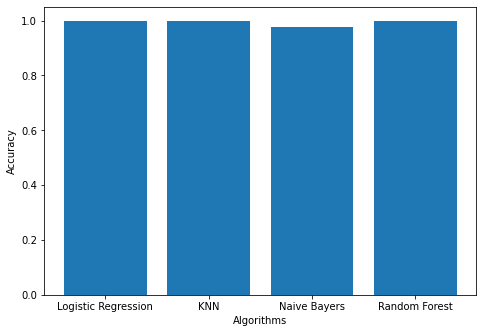

In [88]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algorithm = ['Logistic Regression','KNN','Naive Bayers','Random Forest']
accuracy = [LR_acc,KN_acc,NB_acc,rf_acc]
ax.bar(algorithm,accuracy)
plt.ylabel('Accuracy')
plt.xlabel('Algorithms')
plt.show()